# Project - Credit Modeling (Lending Club)

Credit modeling focuses on modeling a borrower's [credit risk](https://en.wikipedia.org/wiki/Credit_risk). Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. 

We'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/). Lending Club is a marketplace for personal loans that pairs borrowers who are seeking a loan with investors looking to lend money and make a return.

Each borrower completes a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percentage in addition to the requested loan amount that the borrower has to pay back. Lending Club also tries to verify all the information the borrower provides but it can't verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. The interest rates range from 5.32% to 30.99% and each borrower is given a [grade](https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees) according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the [origination fee](https://help.lendingclub.com/hc/en-us/articles/214463677-Rates-and-fees-for-personal-loans) that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers [default](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-) on the loan.

__Project's Objective:__
- __Build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not.__

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. __In this project, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time.__ To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

### Introduction to the Data

I will use the dataset and data dictionary (`LoanStats.html`) provided by Dataquest. The latter downloaded it from the Lending Club website.

The dataset contains approved loans data from 2007 to 2011.

Before we can start doing machine learning, we need to define what features we want to use and which column represents the target column we want to predict. Let's start by reading and exploring the dataset.

In [1]:
import pandas as pd

loans = pd.read_csv("loans_2007.csv", low_memory=False)

loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

In [2]:
loans.isnull().sum().sort_values()

id                               0
addr_state                       3
dti                              3
application_type                 3
policy_code                      3
last_pymnt_amnt                  3
collection_recovery_fee          3
zip_code                         3
revol_bal                        3
total_rec_late_fee               3
initial_list_status              3
out_prncp                        3
out_prncp_inv                    3
total_pymnt                      3
total_pymnt_inv                  3
recoveries                       3
total_rec_prncp                  3
purpose                          3
loan_status                      3
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
home_ownership      

In [3]:
nulls_count = loans.isnull().sum().sort_values()

nulls_count_df = pd.DataFrame(nulls_count, columns=["null_count"])

nulls_count_df['null_count_percentage'] = ( nulls_count_df['null_count'] / loans.shape[0] ) * 100

print( nulls_count_df )


                            null_count  null_count_percentage
id                                   0               0.000000
addr_state                           3               0.007053
dti                                  3               0.007053
application_type                     3               0.007053
policy_code                          3               0.007053
last_pymnt_amnt                      3               0.007053
collection_recovery_fee              3               0.007053
zip_code                             3               0.007053
revol_bal                            3               0.007053
total_rec_late_fee                   3               0.007053
initial_list_status                  3               0.007053
out_prncp                            3               0.007053
out_prncp_inv                        3               0.007053
total_pymnt                          3               0.007053
total_pymnt_inv                      3               0.007053
recoveri

In [4]:
dup_bool = loans.duplicated()

print( sum(dup_bool) )


0


In [5]:
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### Now,
Let's analyze each feature (column) and determine if it:

- discloses/leaks information from the future (after the loan has already been funded)


- requires more data or a lot of processing to turn it into a useful feature


- contains redundant information


- needs to be cleaned up and formatted

Keep in mind that we need to select one of the features as the __target column__.

In [6]:
i = 0
for col in loans.columns:
    
    unique_values = loans[col].unique()
    unique_cnt = len(unique_values)
    
    print( i, ">>>", col, "(", unique_cnt, ",", loans[col].dtype, ")" )
    
    i += 1
    
    if unique_cnt < 20:
        print( "\t", unique_values, "\n\n" )
        
    else:
        j = 1
        print( "\t Some values are:" )
        string = "\t"
        for val in unique_values:
            string += "'{}', ".format(val)
            j += 1
            if j == 11:
                print( string, "\n\n" )
                break



0 >>> id ( 42538 , object )
	 Some values are:
	'1077501', '1077430', '1077175', '1076863', '1075358', '1075269', '1069639', '1072053', '1071795', '1071570',  


1 >>> member_id ( 42536 , float64 )
	 Some values are:
	'1296599.0', '1314167.0', '1313524.0', '1277178.0', '1311748.0', '1311441.0', '1304742.0', '1288686.0', '1306957.0', '1306721.0',  


2 >>> loan_amnt ( 899 , float64 )
	 Some values are:
	'5000.0', '2500.0', '2400.0', '10000.0', '3000.0', '7000.0', '5600.0', '5375.0', '6500.0', '12000.0',  


3 >>> funded_amnt ( 1052 , float64 )
	 Some values are:
	'5000.0', '2500.0', '2400.0', '10000.0', '3000.0', '7000.0', '5600.0', '5375.0', '6500.0', '12000.0',  


4 >>> funded_amnt_inv ( 9247 , float64 )
	 Some values are:
	'4975.0', '2500.0', '2400.0', '10000.0', '3000.0', '5000.0', '7000.0', '5600.0', '5350.0', '6500.0',  


5 >>> term ( 3 , object )
	 [' 36 months' ' 60 months' nan] 


6 >>> int_rate ( 395 , object )
	 Some values are:
	' 10.65%', ' 15.27%', ' 15.96%', ' 13.49%', 

### Features (Columns) Removal

I will remove the following features (columns) because they don't affect a borrower's ability to pay back a loan:

- `id`


- `member_id`

I will remove the following features because they contain only __1__ unique value (low variance feature). This means that the column isn't informative and isn't going to help the model to make better predictions.

- `initial_list_status`


- `collections_12_mths_ex_med`


- `policy_code`


- `application_type`


- `chargeoff_within_12_mths`

I will remove the following features because they require more data or a lot of processing to turn them into useful features:

- `emp_title`


- `title`

#### > `emp_title`:
As we can see below, this column contains a very large number of unique values (30,658 which represent the 72% of the column values) and has data quality issues since some of the values are repeated with slight modifications (e.g. `USAF`, `US Air Force`, `United States Air Force`; `JP Morgan Chase`, `JPMorgan Chase`; `US Army`, `U.S. Army`).

In [7]:
loans['emp_title'].describe()

count       39909
unique      30658
top       US Army
freq          139
Name: emp_title, dtype: object

In [8]:
loans.shape

(42538, 52)

In [9]:
loans['emp_title'].value_counts(dropna=False)

NaN                                 2629
US Army                              139
Bank of America                      115
IBM                                   72
Kaiser Permanente                     61
                                    ... 
Regional Elite Airlines Services       1
Mass General Medical Group             1
Kontera                                1
Southeast Georgia Health ystem         1
Homemaker                              1
Name: emp_title, Length: 30659, dtype: int64

In [10]:
loans['emp_title'].value_counts(dropna=False, normalize=True) * 100

NaN                                 6.180356
US Army                             0.326767
Bank of America                     0.270347
IBM                                 0.169260
Kaiser Permanente                   0.143401
                                      ...   
Regional Elite Airlines Services    0.002351
Mass General Medical Group          0.002351
Kontera                             0.002351
Southeast Georgia Health ystem      0.002351
Homemaker                           0.002351
Name: emp_title, Length: 30659, dtype: float64

In [11]:
loans['emp_title'].value_counts(dropna=False).head(25)

NaN                        2629
US Army                     139
Bank of America             115
IBM                          72
Kaiser Permanente            61
AT&T                         61
UPS                          58
Wells Fargo                  57
USAF                         56
US Air Force                 55
Self Employed                49
United States Air Force      48
Walmart                      47
Lockheed Martin              46
State of California          45
Verizon Wireless             43
U.S. Army                    42
Walgreens                    41
USPS                         41
US ARMY                      40
Self                         39
Best Buy                     38
JPMorgan Chase               38
Target                       38
JP Morgan Chase              38
Name: emp_title, dtype: int64

#### > `title`:
As we can see below, this column contains a large number of unique values (21,264 which represent the 50% of the column values) and has data quality issues since some of the values are repeated with slight modifications (e.g. `Debt Consolidation`, `Debt Consolidation Loan`, `debt consolidation`, `debt_consolidation`).

Also, the `title` and `purpose` columns contain very similar information. The `purpose` column only contains 15 unique values. Therefore, I will remove the `title` column and keep the `purpose` column.

In [12]:
loans['title'].describe()

count                  42522
unique                 21264
top       Debt Consolidation
freq                    2259
Name: title, dtype: object

In [13]:
loans['title'].isnull().sum()

16

In [14]:
loans['title'].value_counts(dropna=False)

Debt Consolidation                  2259
Debt Consolidation Loan             1760
Personal Loan                        708
Consolidation                        547
debt consolidation                   532
                                    ... 
CitiCard PayOff                        1
Taxes Loan                             1
Blazing in 5 years                     1
I was scammed and now recovering       1
Aroundthehouse                         1
Name: title, Length: 21265, dtype: int64

In [15]:
loans['title'].value_counts(dropna=False, normalize=True) * 100

Debt Consolidation                  5.310546
Debt Consolidation Loan             4.137477
Personal Loan                       1.664394
Consolidation                       1.285909
debt consolidation                  1.250646
                                      ...   
CitiCard PayOff                     0.002351
Taxes Loan                          0.002351
Blazing in 5 years                  0.002351
I was scammed and now recovering    0.002351
Aroundthehouse                      0.002351
Name: title, Length: 21265, dtype: float64

In [16]:
loans['title'].value_counts(dropna=False).head(50)

Debt Consolidation                2259
Debt Consolidation Loan           1760
Personal Loan                      708
Consolidation                      547
debt consolidation                 532
Home Improvement                   373
Credit Card Consolidation          370
Debt consolidation                 347
Small Business Loan                333
Personal                           330
Credit Card Loan                   323
personal loan                      266
Consolidation Loan                 264
Home Improvement Loan              255
personal                           247
Loan                               218
consolidation                      217
Wedding Loan                       217
Car Loan                           206
Other Loan                         192
Credit Card Payoff                 164
Wedding                            160
Credit Card Refinance              147
Major Purchase Loan                146
Consolidate                        141
Medical                  

In [17]:
loans['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', nan], dtype=object)

I will remove the following features because they leak information from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

- `funded_amt`, `funded_amnt_inv`, `issue_d`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`, `last_pymnt_d`, `last_pymnt_amnt`

I will remove the following features because they contain redundant information.

- `grade`


- `sub_grade`


- `zip_code`

#### > `grade` and `sub_grade`:
These two columns are based on the borrower's interest rate (`int_rate` column). I prefer to use `int_rate` which contains continuous values than `grade` and `sub_grade` which values are categorical. Continuous values are better suited for machine learning.

In [18]:
loans[['grade', 'sub_grade', 'int_rate']].sample(30).sort_values( by=['grade', 'sub_grade'] )

,grade,sub_grade,int_rate
22182,A,A1,5.42%
6459,A,A1,6.03%
3516,A,A1,6.03%
22790,A,A2,5.79%
24843,A,A2,6.76%
30943,A,A3,7.14%
32341,A,A3,7.14%
19773,A,A4,7.29%
33085,A,A4,8.59%
29874,A,A5,7.88%


In [19]:
tmp_1 = loans[['grade', 'sub_grade', 'int_rate']].copy()

tmp_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   grade      42535 non-null  object
 1   sub_grade  42535 non-null  object
 2   int_rate   42535 non-null  object
dtypes: object(3)
memory usage: 997.1+ KB


In [20]:
tmp_1['int_rate'] = tmp_1['int_rate'].str.rstrip("%").astype("float")


In [21]:
tmp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   grade      42535 non-null  object 
 1   sub_grade  42535 non-null  object 
 2   int_rate   42535 non-null  float64
dtypes: float64(1), object(2)
memory usage: 997.1+ KB


In [22]:
tmp_1['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [23]:
tmp_1['grade'].value_counts(dropna=False).sort_index()

A      10183
B      12389
C       8740
D       6016
E       3394
F       1301
G        512
NaN        3
Name: grade, dtype: int64

In [24]:
import numpy as np

grades = list( tmp_1['grade'].unique() )

grades.remove(np.nan)

grades.sort()


for grade in grades:
    
    grade_bool = tmp_1['grade'] == grade
    
    print( ">> Grade:", grade )
    
    print( " - Sub-grades:", tmp_1[grade_bool]['sub_grade'].unique() )
    
    print( " - Interest Rate info:\n", tmp_1[grade_bool]['int_rate'].describe(), "\n" )


>> Grade: A
 - Sub-grades: ['A4' 'A1' 'A3' 'A5' 'A2']
 - Interest Rate info:
 count    10183.000000
mean         7.342708
std          1.032999
min          5.420000
25%          6.620000
50%          7.490000
75%          7.900000
max          9.630000
Name: int_rate, dtype: float64 

>> Grade: B
 - Sub-grades: ['B2' 'B5' 'B1' 'B3' 'B4']
 - Interest Rate info:
 count    12389.000000
mean        11.014209
std          0.905096
min          6.000000
25%         10.370000
50%         10.990000
75%         11.710000
max         12.690000
Name: int_rate, dtype: float64 

>> Grade: C
 - Sub-grades: ['C4' 'C5' 'C1' 'C3' 'C2']
 - Interest Rate info:
 count    8740.000000
mean       13.499889
std         0.972367
min         6.000000
25%        12.990000
50%        13.490000
75%        13.990000
max        16.110000
Name: int_rate, dtype: float64 

>> Grade: D
 - Sub-grades: ['D1' 'D2' 'D5' 'D3' 'D4']
 - Interest Rate info:
 count    6016.000000
mean       15.577149
std         1.242256
min   

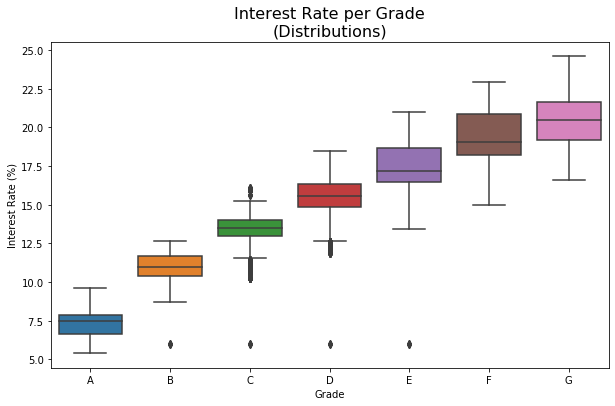

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot( ax = ax, x = 'grade', y = 'int_rate', data = tmp_1, \
             order=['A', 'B', 'C', 'D', 'E', 'F', 'G'] )


plt.title('Interest Rate per Grade\n(Distributions)', fontsize = 16)

plt.ylabel('Interest Rate (%)')

plt.xlabel('Grade')

plt.show()


#### > `zip_code`:
This column is redundant with the `addr_state` column since only the first 3 digits of the 5-digit zip code are visible which can only be used to identify the state the borrower lives in.

In [26]:
loans['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

In [27]:
loans['addr_state'].head()

0    AZ
1    GA
2    IL
3    CA
4    OR
Name: addr_state, dtype: object

Let's proceed to drop the columns:

In [28]:
loans.drop( columns=["id", "member_id", "initial_list_status", "collections_12_mths_ex_med", \
                     "policy_code", "application_type", "chargeoff_within_12_mths", \
                     "emp_title", "title", "funded_amnt", "funded_amnt_inv", "issue_d", \
                     "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", \
                     "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", \
                     "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "grade", \
                     "sub_grade", "zip_code"], inplace=True )


In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   term                  42535 non-null  object 
 2   int_rate              42535 non-null  object 
 3   installment           42535 non-null  float64
 4   emp_length            41423 non-null  object 
 5   home_ownership        42535 non-null  object 
 6   annual_inc            42531 non-null  float64
 7   verification_status   42535 non-null  object 
 8   loan_status           42535 non-null  object 
 9   pymnt_plan            42535 non-null  object 
 10  purpose               42535 non-null  object 
 11  addr_state            42535 non-null  object 
 12  dti                   42535 non-null  float64
 13  delinq_2yrs           42506 non-null  float64
 14  earliest_cr_line      42506 non-null  object 
 15  inq_last_6mths     

In [30]:
loans.shape

(42538, 26)

### Missing Values

Let's check the proportions of the missing values:

In [31]:
loans.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    1368
emp_length              1115
tax_liens                108
revol_util                93
earliest_cr_line          32
delinq_amnt               32
acc_now_delinq            32
total_acc                 32
pub_rec                   32
open_acc                  32
inq_last_6mths            32
delinq_2yrs               32
annual_inc                 7
last_credit_pull_d         7
dti                        3
term                       3
addr_state                 3
purpose                    3
pymnt_plan                 3
loan_status                3
revol_bal                  3
verification_status        3
home_ownership             3
installment                3
int_rate                   3
loan_amnt                  3
dtype: int64

In [32]:
nulls_count = loans.isnull().sum().sort_values(ascending=False)

nulls_count_df = pd.DataFrame(nulls_count, columns=["null_count"])

nulls_count_df['null_count_percentage'] = ( nulls_count_df['null_count'] / loans.shape[0] ) * 100

print( nulls_count_df )


                      null_count  null_count_percentage
pub_rec_bankruptcies        1368               3.215948
emp_length                  1115               2.621186
tax_liens                    108               0.253891
revol_util                    93               0.218628
earliest_cr_line              32               0.075227
delinq_amnt                   32               0.075227
acc_now_delinq                32               0.075227
total_acc                     32               0.075227
pub_rec                       32               0.075227
open_acc                      32               0.075227
inq_last_6mths                32               0.075227
delinq_2yrs                   32               0.075227
annual_inc                     7               0.016456
last_credit_pull_d             7               0.016456
dti                            3               0.007053
term                           3               0.007053
addr_state                     3               0

Above, we can see that the following two columns contain the highest number of missing values (although they both represent a very small percentage of the total number of rows):

- `pub_rec_bankruptcies`


- `emp_length`

#### > `pub_rec_bankruptcies`:

In [33]:
loans['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    39316
1.0     1846
NaN     1368
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [34]:
loans['pub_rec_bankruptcies'].value_counts(dropna=False, normalize=True) * 100

0.0    92.425596
1.0     4.339649
NaN     3.215948
2.0     0.018807
Name: pub_rec_bankruptcies, dtype: float64

We can see that this column has __very little variability__, 92% of values are in the same category. It probably won't have much predictive value. 

Let's drop the `pub_rec_bankruptcies` column.

In [35]:
loans.shape

(42538, 26)

In [36]:
loans.drop( columns=['pub_rec_bankruptcies'], inplace=True )

In [37]:
loans.shape

(42538, 25)

#### > `emp_length`:

Since this column contains only 2.6% of missing values, I will drop its missing values:

In [38]:
loans_2 = loans.dropna( subset=['emp_length'] ).copy()

loans_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41423 entries, 0 to 42535
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            41423 non-null  float64
 1   term                 41423 non-null  object 
 2   int_rate             41423 non-null  object 
 3   installment          41423 non-null  float64
 4   emp_length           41423 non-null  object 
 5   home_ownership       41423 non-null  object 
 6   annual_inc           41419 non-null  float64
 7   verification_status  41423 non-null  object 
 8   loan_status          41423 non-null  object 
 9   pymnt_plan           41423 non-null  object 
 10  purpose              41423 non-null  object 
 11  addr_state           41423 non-null  object 
 12  dti                  41423 non-null  float64
 13  delinq_2yrs          41394 non-null  float64
 14  earliest_cr_line     41394 non-null  object 
 15  inq_last_6mths       41394 non-null 

In [39]:
loans_2.isnull().sum().sort_values(ascending=False)

tax_liens              105
revol_util              87
delinq_2yrs             29
delinq_amnt             29
acc_now_delinq          29
total_acc               29
pub_rec                 29
open_acc                29
inq_last_6mths          29
earliest_cr_line        29
last_credit_pull_d       4
annual_inc               4
revol_bal                0
loan_amnt                0
term                     0
addr_state               0
purpose                  0
pymnt_plan               0
loan_status              0
verification_status      0
home_ownership           0
emp_length               0
installment              0
int_rate                 0
dti                      0
dtype: int64

We can see (above) that the remaining number of missing values is insignificant. Hence, let's proceed to drop them:

In [40]:
loans_2.shape

(41423, 25)

In [41]:
# By default, the axis parameter is set to "0" (which is equivalent to "index") which means:
# drop rows which contain missing values
loans_2.dropna( axis=0, inplace=True )


In [42]:
loans_2.shape

(41259, 25)

In [43]:
loans_2.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
acc_now_delinq         0
delinq_amnt            0
tax_liens              0
dtype: int64

### Features (columns) that need to be cleaned up and formatted:

- `term`


- `emp_length`


- `home_ownership`


- `int_rate`


- `revol_util`

#### > `term`:

I can see that this column is being considered as _nominal_ (i.e. variable measured on a nominal scale). I will change it to a _ratio_ scale because I realized that this column is quantitative (instead of qualitative) and we can tell the direction and the size of the difference.

I will convert this column from string to numeric data type. Values are in months and can be either 36 or 60.

In [44]:
loans_2['term'].dtype

dtype('O')

In [45]:
loans_2['term'].value_counts(dropna=False)

 36 months    30539
 60 months    10720
Name: term, dtype: int64

In [46]:
term_dict = {
    " 36 months": 36,
    " 60 months": 60
}

loans_2['term'] = loans_2['term'].map( term_dict )


In [47]:
loans_2['term'].value_counts(dropna=False)

36    30539
60    10720
Name: term, dtype: int64

In [48]:
loans_2['term'].dtype

dtype('int64')

#### > `emp_length`:

I can see that this column is being considered as _nominal_ (i.e. variable measured on a nominal scale). I will change it to a _ratio_ scale because I realized that this column is quantitative (instead of qualitative) and we can tell the direction and the size of the difference.

I will convert this column from string to numeric data type. The column units are _years_.

In [49]:
loans_2['emp_length'].dtype

dtype('O')

In [50]:
loans_2['emp_length'].value_counts()

10+ years    9357
< 1 year     5004
2 years      4727
3 years      4354
4 years      3635
1 year       3568
5 years      3451
6 years      2370
7 years      1869
8 years      1587
9 years      1337
Name: emp_length, dtype: int64

In [51]:
loans_2['emp_length'].value_counts(normalize=True) * 100

10+ years    22.678688
< 1 year     12.128263
2 years      11.456894
3 years      10.552849
4 years       8.810199
1 year        8.647810
5 years       8.364236
6 years       5.744201
7 years       4.529921
8 years       3.846434
9 years       3.240505
Name: emp_length, dtype: float64

In [52]:
emp_length_dict = {
    "10+ years": 10,
    "9 years": 9,
    "8 years": 8,
    "7 years": 7,
    "6 years": 6,
    "5 years": 5,
    "4 years": 4,
    "3 years": 3,
    "2 years": 2,
    "1 year": 1,
    "< 1 year": 0.5
}

loans_2['emp_length'] = loans_2['emp_length'].map( emp_length_dict )


In [53]:
loans_2['emp_length'].value_counts()

10.0    9357
0.5     5004
2.0     4727
3.0     4354
4.0     3635
1.0     3568
5.0     3451
6.0     2370
7.0     1869
8.0     1587
9.0     1337
Name: emp_length, dtype: int64

In [54]:
loans_2['emp_length'].dtype

dtype('float64')

#### > `home_ownership`:

According to the columns dictionary, the allowed values are: `RENT`, `MORTGAGE`, `OWN`, `OTHER`.

I will replace the two `NONE` values with `OTHER`.

In [55]:
loans_2['home_ownership'].value_counts()

RENT        19667
MORTGAGE    18443
OWN          3013
OTHER         134
NONE            2
Name: home_ownership, dtype: int64

In [56]:
none_bool = loans_2['home_ownership'] == "NONE"

none_bool.sum()


2

In [57]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,NONE,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,Apr-1994,0.0,9.0,0.0,4767.0,8.7%,22.0,Jan-2011,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,NONE,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,May-1996,3.0,7.0,0.0,3193.0,59.1%,26.0,Jan-2009,0.0,0.0,0.0


In [58]:
loans_2[none_bool]['home_ownership'] = "OTHER"

C:\Users\helen\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,NONE,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,Apr-1994,0.0,9.0,0.0,4767.0,8.7%,22.0,Jan-2011,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,NONE,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,May-1996,3.0,7.0,0.0,3193.0,59.1%,26.0,Jan-2009,0.0,0.0,0.0


In [60]:
loans_2[none_bool].index

Int64Index([39387, 42212], dtype='int64')

In [61]:
loans_2.loc[ loans_2[none_bool].index, 'home_ownership' ] = "OTHER" 

In [62]:
loans_2[none_bool]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
39387,10000.0,36,7.75%,312.22,5.0,OTHER,22200.0,Not Verified,Fully Paid,n,debt_consolidation,VA,5.24,0.0,Apr-1994,0.0,9.0,0.0,4767.0,8.7%,22.0,Jan-2011,0.0,0.0,0.0
42212,15000.0,36,15.65%,524.77,6.0,OTHER,72000.0,Not Verified,Does not meet the credit policy. Status:Charge...,n,other,GA,8.73,2.0,May-1996,3.0,7.0,0.0,3193.0,59.1%,26.0,Jan-2009,0.0,0.0,0.0


In [63]:
loans_2['home_ownership'].value_counts()

RENT        19667
MORTGAGE    18443
OWN          3013
OTHER         136
Name: home_ownership, dtype: int64

#### > `int_rate` and `revol_util`:

For these two columns, I will remove the percentage sign and convert them from string to numeric data type.

In [64]:
loans_2['int_rate'].value_counts()

 10.99%    946
 13.49%    818
 11.49%    812
  7.51%    756
  7.88%    715
          ... 
 21.48%      1
 17.41%      1
 17.44%      1
 16.33%      1
 22.64%      1
Name: int_rate, Length: 394, dtype: int64

In [65]:
loans_2['int_rate'].dtype

dtype('O')

In [66]:
loans_2['revol_util'].value_counts()

0%        1031
0.2%        63
40.7%       63
63%         62
66.6%       61
          ... 
21.72%       1
21.59%       1
39.95%       1
0.01%        1
105.3%       1
Name: revol_util, Length: 1116, dtype: int64

In [67]:
loans_2['revol_util'].dtype

dtype('O')

In [68]:
loans_2['int_rate'] = loans_2['int_rate'].str.rstrip("%").astype("float")

loans_2['revol_util'] = loans_2['revol_util'].str.rstrip("%").astype("float")


In [69]:
loans_2['int_rate'].dtype

dtype('float64')

In [70]:
loans_2['revol_util'].dtype

dtype('float64')

### Target Column

Let's use the `loan_status` column as the target column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower.

In [71]:
loans_2['loan_status'].value_counts()

Fully Paid                                             32257
Charged Off                                             5389
Does not meet the credit policy. Status:Fully Paid      1906
Current                                                  923
Does not meet the credit policy. Status:Charged Off      733
Late (31-120 days)                                        23
In Grace Period                                           18
Late (16-30 days)                                          8
Default                                                    2
Name: loan_status, dtype: int64

In [72]:
loans_2['loan_status'].value_counts(normalize=True) * 100

Fully Paid                                             78.181730
Charged Off                                            13.061393
Does not meet the credit policy. Status:Fully Paid      4.619598
Current                                                 2.237088
Does not meet the credit policy. Status:Charged Off     1.776582
Late (31-120 days)                                      0.055745
In Grace Period                                         0.043627
Late (16-30 days)                                       0.019390
Default                                                 0.004847
Name: loan_status, dtype: float64

There are 9 different possible values for the `loan_status` column:

- You can read [here](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-) about most of the different loan statuses.


- Explanation found in the [internet](https://www.uxax.org/post/data-cleaning-and-preparation-for-machine-learning) with regard to the two values that start with `Does not meet the credit policy`: "While the loan was [paid off / charged off], the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."

__From the investor's perspective, we're interested in trying to predict which loans will be paid off on time and which ones won't be__. Only the `Fully Paid` and `Charged Off` values describe the final outcome of the loan. The other values describe loans that are in progress and where we do not know if the borrower will pay back the loan on time or not. While the `Default` status resembles the `Charged Off` status, according to [Lending Club](https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-), loans that are charged off have essentially no chance of being repaid while default ones have a small chance.

Since we're interested in being able to predict which of these 2 values a loan will fall under, we can treat the problem as a __binary classification__ one. 

Let's remove all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status and then transform the `Fully Paid` values to `1` for the positive case and the `Charged Off` values to `0` for the negative case.

Lastly, one thing we need to keep in mind is the __class imbalance__ between the positive and negative cases. While there are 32,257 loans that have been fully paid off, there are only 5,389 that were charged off. 

- There are about __6 times__ as many loans that were paid off on time (positive case, label of `1`) than those that weren't (negative case, label of `0`).

This class imbalance is a common problem in binary classification and during training, the model ends up having a strong bias towards predicting the class with more observations in the training set and will rarely predict the class with less observations. The stronger the imbalance, the more biased the model becomes.

Due to its potential to cause issues, we need to keep the class imbalance in mind as we build machine learning models.

In [73]:
loans_2.shape

(41259, 25)

In [74]:
loan_status_bool = (loans_2['loan_status'] == "Fully Paid") | (loans_2['loan_status'] == "Charged Off")

loans_3 = loans_2[loan_status_bool].copy()


status_replace = { "loan_status": {
                            "Fully Paid": 1,
                            "Charged Off": 0
                    } 
                 }


loans_3 = loans_3.replace( status_replace )


In [75]:
loans_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37646 non-null  float64
 1   term                 37646 non-null  int64  
 2   int_rate             37646 non-null  float64
 3   installment          37646 non-null  float64
 4   emp_length           37646 non-null  float64
 5   home_ownership       37646 non-null  object 
 6   annual_inc           37646 non-null  float64
 7   verification_status  37646 non-null  object 
 8   loan_status          37646 non-null  int64  
 9   pymnt_plan           37646 non-null  object 
 10  purpose              37646 non-null  object 
 11  addr_state           37646 non-null  object 
 12  dti                  37646 non-null  float64
 13  delinq_2yrs          37646 non-null  float64
 14  earliest_cr_line     37646 non-null  object 
 15  inq_last_6mths       37646 non-null 

In [76]:
loans_3.shape

(37646, 25)

In [77]:
loans_3['loan_status'].value_counts(dropna=False)

1    32257
0     5389
Name: loan_status, dtype: int64

### Removing More Single Value Columns

By removing all the loans that don't contain either `Fully Paid` and `Charged Off` as the loan's status we ended up with 37,646 rows (we had originally 42,538).

Therefore, let's look for any additional columns that contain only one unique value (low variance features) and remove them. These columns won't be useful for the model since they don't add any information to each loan application.

In [78]:
low_variance_features = []

for col in loans_3.columns:
    
    if len( loans_3[col].unique() ) == 1:
        
        low_variance_features.append(col)


print( low_variance_features )


['pymnt_plan', 'acc_now_delinq', 'delinq_amnt', 'tax_liens']


In [79]:
loans_3.drop( columns=low_variance_features, inplace=True )


In [80]:
loans_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37646 non-null  float64
 1   term                 37646 non-null  int64  
 2   int_rate             37646 non-null  float64
 3   installment          37646 non-null  float64
 4   emp_length           37646 non-null  float64
 5   home_ownership       37646 non-null  object 
 6   annual_inc           37646 non-null  float64
 7   verification_status  37646 non-null  object 
 8   loan_status          37646 non-null  int64  
 9   purpose              37646 non-null  object 
 10  addr_state           37646 non-null  object 
 11  dti                  37646 non-null  float64
 12  delinq_2yrs          37646 non-null  float64
 13  earliest_cr_line     37646 non-null  object 
 14  inq_last_6mths       37646 non-null  float64
 15  open_acc             37646 non-null 

In [81]:
loans_3.shape

(37646, 21)

### Dummy Variables

Let's use dummy variables for columns containing categorical values. Whenever we have more than 2 categories, we need to create more columns to represent the categories.

In [82]:
object_columns_df = loans_3.select_dtypes( include=['object'] )

object_columns_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   home_ownership       37646 non-null  object
 1   verification_status  37646 non-null  object
 2   purpose              37646 non-null  object
 3   addr_state           37646 non-null  object
 4   earliest_cr_line     37646 non-null  object
 5   last_credit_pull_d   37646 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [83]:
object_columns_df.describe()

,home_ownership,verification_status,purpose,addr_state,earliest_cr_line,last_credit_pull_d
count,37646,37646,37646,37646,37646,37646
unique,4,3,14,50,514,104
top,RENT,Not Verified,debt_consolidation,CA,Oct-1999,Jun-2016
freq,18104,16246,17747,6776,355,10474


### > IMPORTANT NOTE:

Given the __high__ number of unique values of columns `addr_state`, `earliest_cr_line` and `last_credit_pull_d` (see above table), I would like to approach the problem in three different ways (by using three different dataframes).

1. Option 1: Consider the columns that do not have a high number of unique values: `home_ownership`, `verification_status`, and `purpose`


2. Option 2: Consider the columns from Option 1 plus the `addr_state`


3. Option 3: Consider all six columns (this will be implemented in the future)

### > Option 1:

In [84]:
loans_3.shape


(37646, 21)

In [85]:
option_1_columns = ["home_ownership", "verification_status", "purpose"]

dummy_df = pd.get_dummies( loans_3[option_1_columns] )

loans_opt_1 = pd.concat( [loans_3, dummy_df], axis=1 )

loans_opt_1.drop( columns=option_1_columns, inplace=True )


In [86]:
loans_opt_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37646 non-null  float64
 1   term                                 37646 non-null  int64  
 2   int_rate                             37646 non-null  float64
 3   installment                          37646 non-null  float64
 4   emp_length                           37646 non-null  float64
 5   annual_inc                           37646 non-null  float64
 6   loan_status                          37646 non-null  int64  
 7   addr_state                           37646 non-null  object 
 8   dti                                  37646 non-null  float64
 9   delinq_2yrs                          37646 non-null  float64
 10  earliest_cr_line                     37646 non-null  object 
 11  inq_last_6mths              

In [87]:
loans_opt_1.shape

(37646, 39)

In [88]:
loans_opt_1.drop( columns=['addr_state', 'earliest_cr_line', 'last_credit_pull_d'], inplace=True )


In [89]:
loans_opt_1.shape

(37646, 36)

#### Dummy Variable Trap (DVT)

In [90]:
loans_opt_1_dvt = loans_opt_1.copy()

loans_opt_1_dvt.drop( columns=['home_ownership_MORTGAGE', 'verification_status_Not Verified', \
                               'purpose_car'], inplace=True )


In [91]:
loans_opt_1_dvt.shape

(37646, 33)

### > Option 2:

In [92]:
loans_3.shape


(37646, 21)

In [93]:
option_2_columns = ["home_ownership", "verification_status", "purpose", "addr_state"]

dummy_df = pd.get_dummies( loans_3[option_2_columns] )

loans_opt_2 = pd.concat( [loans_3, dummy_df], axis=1 )

loans_opt_2.drop( columns=option_2_columns, inplace=True )


In [94]:
loans_opt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37646 non-null  float64
 1   term                                 37646 non-null  int64  
 2   int_rate                             37646 non-null  float64
 3   installment                          37646 non-null  float64
 4   emp_length                           37646 non-null  float64
 5   annual_inc                           37646 non-null  float64
 6   loan_status                          37646 non-null  int64  
 7   dti                                  37646 non-null  float64
 8   delinq_2yrs                          37646 non-null  float64
 9   earliest_cr_line                     37646 non-null  object 
 10  inq_last_6mths                       37646 non-null  float64
 11  open_acc                    

In [95]:
loans_opt_2.shape

(37646, 88)

In [96]:
loans_opt_2.drop( columns=['earliest_cr_line', 'last_credit_pull_d'], inplace=True )


In [97]:
loans_opt_2.shape

(37646, 86)

#### Dummy Variable Trap

In [98]:
loans_opt_2_dvt = loans_opt_2.copy()

loans_opt_2_dvt.drop( columns=['home_ownership_MORTGAGE', 'verification_status_Not Verified', \
                               'purpose_car', 'addr_state_AZ'], inplace=True )


In [99]:
loans_opt_2_dvt.shape

(37646, 82)

### > Option 3:

In [100]:
loans_3.shape

(37646, 21)

In [101]:
option_3_columns = [ "home_ownership", "verification_status", "purpose", "addr_state", \
                     "earliest_cr_line", "last_credit_pull_d" ]

dummy_df = pd.get_dummies( loans_3[option_3_columns], drop_first=True )

loans_opt_3_dvt = pd.concat( [loans_3, dummy_df], axis=1 )

loans_opt_3_dvt.drop( columns=option_3_columns, inplace=True )


In [102]:
loans_opt_3_dvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Columns: 698 entries, loan_amnt to last_credit_pull_d_Sep-2015
dtypes: float64(13), int64(2), uint8(683)
memory usage: 29.1 MB


In [103]:
loans_opt_3_dvt.shape

(37646, 698)

### Selecting an Error Metric

An error metric will help us figure out when our model is performing well, and when it's performing poorly. Since we will be using a machine learning model to predict whether or not we should fund a loan on the Lending Club platform, our final goal is to make money. 

- We want to fund enough loans that are paid off on time to compensate for our losses from loans that aren't paid off.

An error metric will help us determine if our algorithm will make us money or lose us money.

In this case, we're primarily concerned with false positives and false negatives. Both of these are different types of misclassifications. 

- With a __false positive__, we predict that a loan will be paid off on time, but it actually isn't. This costs us money, since we fund loans that lose us money. 


- With a __false negative__, we predict that a loan won't be paid off on time, but it actually would be paid off on time. This loses us potential money, since we didn't fund a loan that actually would have been paid off.

Since we're viewing this problem from the standpoint of a __conservative investor__, we need to treat false positives differently than false negatives. __A conservative investor would want to minimize risk and avoid false positives as much as possible.__ We would be more secure with missing out on opportunities (false negatives) than we would be with funding a risky loan (false positives).

We mentioned earlier that there is a significant __class imbalance__ in the `loan_status` column. There are __6 times__ as many loans that were paid off on time (`1`), than loans that weren't paid off on time (`0`). This causes a major issue when we use __accuracy__ as a metric. Due to the class imbalance, a classifier can predict 1 for every row, and still have high accuracy.

- Accuracy = number of correct predictions divided by the number of total predictions

In this case, we will not use accuracy and instead will use metrics that tell us the number of false positives and false negatives.

This means that we should optimize for:

- __High__ True Positive Rate (TPR) -- aka Sensitivity or Recall

    * The percentage of loans that should be funded that I would fund


- __Low__ False Positive Rate (FPR) -- aka Fall-Out

    * The percentage of the loans that shouldn't be funded that I would fund

### Rescale (Normalize) the Numeric Features

Let's rescale (Min-Max Normalization) the values in the numeric columns so they all range from 0 to 1.

In [104]:
loans_opt_1_dvt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37646 non-null  float64
 1   term                                 37646 non-null  int64  
 2   int_rate                             37646 non-null  float64
 3   installment                          37646 non-null  float64
 4   emp_length                           37646 non-null  float64
 5   annual_inc                           37646 non-null  float64
 6   loan_status                          37646 non-null  int64  
 7   dti                                  37646 non-null  float64
 8   delinq_2yrs                          37646 non-null  float64
 9   inq_last_6mths                       37646 non-null  float64
 10  open_acc                             37646 non-null  float64
 11  pub_rec                     

In [105]:
numeric_cols = loans_opt_1_dvt.select_dtypes( include=['int64', 'float64'] ).columns

numeric_cols


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [106]:
len(numeric_cols)

15

In [107]:
numeric_cols = numeric_cols.drop("loan_status")

In [108]:
len(numeric_cols)

14

In [109]:
loans_opt_1_dvt[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,3.764600e+04,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000
mean,11155.178505,42.020719,11.977565,325.160998,5.008620,6.943326e+04,13.297673,0.147081,0.872390,9.307549,0.053764,13385.077299,48.891233,22.109255
std,7368.602406,10.404378,3.689196,208.871252,3.477363,6.461340e+04,6.660026,0.493243,1.071156,4.395119,0.234674,15887.624561,28.334628,11.406657
min,500.000000,36.000000,5.420000,15.690000,0.500000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5500.000000,36.000000,9.070000,167.730000,2.000000,4.100000e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3713.000000,25.500000,14.000000
50%,10000.000000,36.000000,11.830000,280.910000,4.000000,6.000000e+04,13.390000,0.000000,1.000000,9.000000,0.000000,8869.500000,49.300000,20.000000
75%,15000.000000,60.000000,14.460000,430.217500,9.000000,8.300000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,17039.000000,72.400000,29.000000
max,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000


In [110]:
loans_opt_1_dvt_norm = loans_opt_1_dvt.copy()


In [111]:
for col in numeric_cols:
    
    loans_opt_1_dvt_norm[col] = ( loans_opt_1_dvt[col] - loans_opt_1_dvt[col].min() ) / \
                                ( loans_opt_1_dvt[col].max() - loans_opt_1_dvt[col].min() )


In [112]:
loans_opt_1_dvt_norm[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000,37646.000000
mean,0.308846,0.250863,0.342074,0.239993,0.474592,0.010913,0.443404,0.013371,0.109049,0.173989,0.013441,0.089480,0.489402,0.228514
std,0.213583,0.433516,0.192446,0.161978,0.366038,0.010776,0.222075,0.044840,0.133895,0.104646,0.058669,0.106209,0.283630,0.129621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144928,0.000000,0.190402,0.117906,0.157895,0.006171,0.272424,0.000000,0.000000,0.095238,0.000000,0.024822,0.255255,0.136364
50%,0.275362,0.000000,0.334377,0.205677,0.368421,0.009340,0.446482,0.000000,0.125000,0.166667,0.000000,0.059293,0.493493,0.204545
75%,0.420290,1.000000,0.471570,0.321464,0.894737,0.013175,0.618873,0.000000,0.125000,0.238095,0.000000,0.113906,0.724725,0.306818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
loans_opt_1_dvt_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37646 non-null  float64
 1   term                                 37646 non-null  float64
 2   int_rate                             37646 non-null  float64
 3   installment                          37646 non-null  float64
 4   emp_length                           37646 non-null  float64
 5   annual_inc                           37646 non-null  float64
 6   loan_status                          37646 non-null  int64  
 7   dti                                  37646 non-null  float64
 8   delinq_2yrs                          37646 non-null  float64
 9   inq_last_6mths                       37646 non-null  float64
 10  open_acc                             37646 non-null  float64
 11  pub_rec                     

In [114]:
loans_opt_1_dvt.sample(10)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
10141,10000.0,36,13.99,341.73,3.0,190000.0,1,24.64,0.0,1.0,18.0,0.0,74891.0,92.1,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
15926,4300.0,36,5.99,130.80,4.0,27000.0,1,18.40,0.0,3.0,14.0,0.0,7121.0,23.3,42.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9753,10000.0,36,9.99,322.63,1.0,65000.0,1,1.61,0.0,1.0,4.0,0.0,5122.0,18.2,8.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28581,16000.0,60,11.86,229.50,3.0,35000.0,1,8.85,0.0,1.0,5.0,0.0,15360.0,69.6,13.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26053,6000.0,60,13.98,139.55,3.0,27996.0,0,4.16,0.0,0.0,4.0,0.0,2336.0,83.4,18.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
30673,12000.0,36,7.88,375.37,1.0,50000.0,1,19.75,0.0,0.0,11.0,0.0,3379.0,25.2,20.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11599,5950.0,36,5.99,180.99,6.0,42000.0,1,21.83,0.0,0.0,7.0,0.0,5051.0,23.8,17.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25320,10000.0,36,11.86,331.48,10.0,77256.0,1,20.13,0.0,0.0,11.0,1.0,12840.0,35.6,21.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
30704,8000.0,36,14.22,274.28,2.0,134000.0,1,17.54,0.0,1.0,19.0,0.0,65951.0,68.9,47.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4342,35000.0,60,11.71,773.44,7.0,88000.0,0,6.56,0.0,0.0,10.0,0.0,574.0,1.4,21.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


#### > `dti`:

[Source](https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp)

A debt-to-income ratio (DTI) is a personal finance measure that compares the amount of debt you have to your overall income. Lenders, including issuers of mortgages, use it as a way to measure your ability to manage the payments you make each month and repay the money you have borrowed.

Lenders look for low debt-to-income (DTI) figures because they often believe these borrowers with a small debt-to-income ratio are more likely to successfully manage monthly payments.

A low debt-to-income ratio demonstrates a good balance between debt and income. In general, the lower the percentage, the better the chance you will be able to get the loan or line of credit you want.

On the contrary, a high debt-to-income ratio signals that you may have too much debt for the income you have, and lenders view this as a signal that you would be unable to take on any additional obligations.

In [115]:
ls_0_bool = loans_opt_1['loan_status'] == 0

loans_opt_1[ls_0_bool]['dti'].describe()


count    5389.000000
mean       13.990559
std         6.569531
min         0.000000
25%         9.050000
50%        14.310000
75%        19.260000
max        29.850000
Name: dti, dtype: float64

In [116]:
ls_1_bool = loans_opt_1['loan_status'] == 1

loans_opt_1[ls_1_bool]['dti'].describe()


count    32257.000000
mean        13.181916
std          6.668110
min          0.000000
25%          8.030000
50%         13.220000
75%         18.430000
max         29.990000
Name: dti, dtype: float64

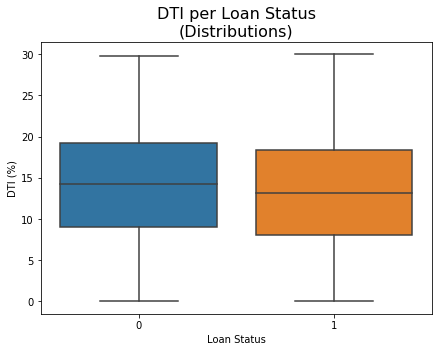

In [117]:
fig, ax = plt.subplots(figsize=(7,5))

sns.boxplot( ax = ax, x = 'loan_status', y = 'dti', data = loans_opt_1 )


plt.title('DTI per Loan Status\n(Distributions)', fontsize = 16)

plt.ylabel('DTI (%)')

plt.xlabel('Loan Status')

plt.show()


*** According to the [theory](https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp), the above behavior is not normal (i.e. expected).

### Logistic Regression

A good first algorithm to apply to binary classification problems is logistic regression, for the following reasons:

- it's quick to train and we can iterate more quickly,


- it's less prone to overfitting than more complex models like decision trees,


- it's easy to interpret.

In [118]:
loans_opt_1_dvt_norm.shape

(37646, 33)

In [119]:
cols = loans_opt_1_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [120]:
features = loans_opt_1_dvt_norm[train_cols]

target = loans_opt_1_dvt_norm["loan_status"]


In [121]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr


LogisticRegression()

In [122]:
from sklearn import get_config

get_config()


{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': True,
 'display': 'text'}

In [123]:
from sklearn import set_config

set_config( print_changed_only=False )


In [124]:
get_config()

{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': False,
 'display': 'text'}

In [125]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### > 3 Folds (k-fold cross validation)

In [126]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict( lr, features, target, cv=3 )


print( type(predictions) )
print( predictions.size )


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

<class 'numpy.ndarray'>
37646


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [127]:
lr = LogisticRegression( solver='liblinear' )

lr


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
predictions = cross_val_predict( lr, features, target, cv=3 )


print( type(predictions) )
print( predictions.size )


<class 'numpy.ndarray'>
37646


In [129]:
predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

### *** Functions:

In [130]:
def compute_confusion_matrix( df, predictions, target ):
    
    # False positives.
    fp_filter = (predictions == 1) & (df[target] == 0)

    fp = len(predictions[fp_filter])

    print("> False Positives:", fp, "\n")


    # True positives.
    tp_filter = (predictions == 1) & (df[target] == 1)

    tp = len(predictions[tp_filter])

    print("> True Positives:", tp, "\n")


    # False negatives.
    fn_filter = (predictions == 0) & (df[target] == 1)

    fn = len(predictions[fn_filter])

    print("> False Negatives:", fn, "\n")


    # True negatives
    tn_filter = (predictions == 0) & (df[target] == 0)

    tn = len(predictions[tn_filter])

    print("> True Negatives:", tn, "\n")
    
    
    return tp, tn, fp, fn



In [131]:
def compute_tpr( tp, fn ):
    
    # Rates
    tpr = tp / (tp + fn)

    print("True Positive Rate:", tpr, "\n")



In [132]:
def compute_fpr( fp, tn ):
    
    fpr = fp / (fp + tn)

    print("False Positive Rate:", fpr, "\n")



In [133]:
def compute_precision( tp, fp ):
    
    precision = tp / (tp + fp)

    print("Precision:", precision, "\n")



In [134]:
def compute_net_profit( df, predictions, target ):
    
    # True positives
    tp_filter = (predictions == 1) & (df[target] == 1)
    
    earnings = df[tp_filter]['loan_amnt'] * ( df[tp_filter]['int_rate'] / 100 )

    print( "Earnings: {amount:,.0f} \n".format( amount=earnings.sum() ) )


    # False positives
    fp_filter = (predictions == 1) & (df[target] == 0)

    losses = df[fp_filter]['loan_amnt']

    print( "Losses: {amount:,.0f} \n".format( amount=losses.sum() ) )
    
    
    net_profit = earnings.sum() - losses.sum()
    
    print( "Net profit: {amount:,.0f}".format( amount=net_profit ) )



In [135]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5290 

> True Positives: 32137 

> False Negatives: 120 

> True Negatives: 99 



In [136]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9962798772359488 

False Positive Rate: 0.9816292447578401 

Precision: 0.8586581879391882 



In [137]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 43,264,546 

Losses: 64,403,125 

Net profit: -21,138,579


Currently, the classifier is not accounting for the imbalance in the classes.

Next, Let's tell the classifier to penalize misclassifications of the less prevalent class more than the other class.

### Penalizing the Classifier

#### > `class_weight` = `balanced`

By setting the `class_weight` parameter to `balanced` (when creating the LogisticRegression instance) we are telling scikit-learn to penalize the misclassification of the minority class during the training process. The penalty means that the logistic regression classifier pays more attention to correctly classifying rows where `loan_status` is `0`. This lowers accuracy when `loan_status` is `1`, but increases accuracy when `loan_status` is `0`.

__The penalty is set to be inversely proportional to the class frequencies.__ This would mean that for the classifier, correctly classifying a row where `loan_status` is `0` is __6 times__ more important than correctly classifying a row where `loan_status` is `1`.

In [138]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=3 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [139]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2105 

> True Positives: 21581 

> False Negatives: 10676 

> True Negatives: 3284 



In [140]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.669033078091577 

False Positive Rate: 0.39061050287622934 

Precision: 0.9111289369247657 



In [141]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 22,808,433 

Losses: 21,727,950 

Net profit: 1,080,483


### Number of Folds (cross validation) = 5

In [142]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=5 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [143]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2158 

> True Positives: 21752 

> False Negatives: 10505 

> True Negatives: 3231 



In [144]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.67433425303035 

False Positive Rate: 0.40044535164223416 

Precision: 0.9097448766206608 



In [145]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 22,885,135 

Losses: 22,139,175 

Net profit: 745,960


### Number of Folds (cross validation) = 10

In [146]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [147]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2081 

> True Positives: 21458 

> False Negatives: 10799 

> True Negatives: 3308 



In [148]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6652199522584246 

False Positive Rate: 0.3861569864538876 

Precision: 0.9115935256383024 



In [149]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 22,529,712 

Losses: 21,394,700 

Net profit: 1,135,012


#### solver = 'lbfgs'

In [150]:
lr = LogisticRegression( class_weight="balanced" )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\helen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

(37646,)

In [151]:
lr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2081 

> True Positives: 21462 

> False Negatives: 10795 

> True Negatives: 3308 



In [153]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6653439563505595 

False Positive Rate: 0.3861569864538876 

Precision: 0.9116085460646477 



In [154]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 22,533,033 

Losses: 21,374,900 

Net profit: 1,158,133


The `lbfgs` solver (algorithm to use in the optimization problem) performs similar as the `liblinear` one.

#### > `class_weight` = Harsher Penalty

We can try to lower the false positive rate (FPR) further by assigning a harsher (higher) penalty for misclassifying the negative class.

#### Penalty = 7:

In [155]:
penalty = {
    0: 7,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [156]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1652 

> True Positives: 18897 

> False Negatives: 13360 

> True Negatives: 3737 



In [157]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5858263322689649 

False Positive Rate: 0.30655038040452776 

Precision: 0.9196067935179327 



In [158]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 19,092,517 

Losses: 16,923,100 

Net profit: 2,169,417


#### Penalty = 8:

In [159]:
penalty = {
    0: 8,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [160]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1315 

> True Positives: 16683 

> False Negatives: 15574 

> True Negatives: 4074 



In [161]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5171900672722199 

False Positive Rate: 0.2440155873074782 

Precision: 0.9269363262584731 



In [162]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 16,252,004 

Losses: 13,455,975 

Net profit: 2,796,029


#### Penalty = 9:

In [163]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [164]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1047 

> True Positives: 14610 

> False Negatives: 17647 

> True Negatives: 4342 



In [165]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4529249465232353 

False Positive Rate: 0.19428465392466135 

Precision: 0.9331289519064955 



In [166]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,717,343 

Losses: 10,499,725 

Net profit: 3,217,618


#### Penalty = 10:

In [167]:
penalty = {
    0: 10,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [168]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 844 

> True Positives: 12876 

> False Negatives: 19381 

> True Negatives: 4545 



In [169]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.39916917258269524 

False Positive Rate: 0.15661532751902021 

Precision: 0.9384839650145773 



In [170]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 11,665,587 

Losses: 8,403,275 

Net profit: 3,262,312


#### Penalty = 11:

In [171]:
penalty = {
    0: 11,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [172]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 692 

> True Positives: 11359 

> False Negatives: 20898 

> True Negatives: 4697 



In [173]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.35214062064048113 

False Positive Rate: 0.12840972351085544 

Precision: 0.9425773794705834 



In [174]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 9,948,677 

Losses: 6,992,925 

Net profit: 2,955,752


#### Penalty = 12:

In [175]:
penalty = {
    0: 12,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [176]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 561 

> True Positives: 9998 

> False Negatives: 22259 

> True Negatives: 4828 



In [177]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.3099482282915336 

False Positive Rate: 0.10410094637223975 

Precision: 0.9468699687470404 



In [178]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 8,536,655 

Losses: 5,606,275 

Net profit: 2,930,380


#### Penalty = 15:

In [179]:
penalty = {
    0: 15,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [180]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 322 

> True Positives: 6800 

> False Negatives: 25457 

> True Negatives: 5067 



In [181]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.21080695662956878 

False Positive Rate: 0.05975134533308592 

Precision: 0.9547879809042403 



In [182]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 5,364,892 

Losses: 3,280,625 

Net profit: 2,084,267


### Summary of the above results:
- Logistic Regression model
- solver = 'liblinear'
- K-Fold Cross Validation, k = 10

#### First:
(Ignoring the profit information)

|     Penalty     | TPR (Recall) % | FPR (Fall-out) % | Precision % |
|:---------------:|:--------------:|:----------------:|:-----------:|
| Balanced (5.89) |      66.52     |       38.62      |    91.16    |
|        7        |      58.58     |       30.65      |    91.96    |
|        8        |      51.72     |       24.40      |    92.69    |
|        9        |      45.29     |       19.43      |    93.31    |
|        10       |      39.92     |       15.66      |    93.85    |
|        11       |      35.21     |       12.84      |    94.26    |
|        12       |       31       |       10.41      |    94.69    |
|        15       |      21.08     |       5.97       |    95.48    |

Initially, we can see that assigning manual penalties lowered the false positive rate, and thus lowered our risk. Note that this comes at the expense of true positive rate. While we have fewer false positives, we're also missing opportunities to fund more loans and potentially make more money. Given that we're approaching this as a conservative investor, this strategy makes sense, but it's worth keeping in mind the tradeoffs.

#### Second:

|     Penalty     | TPR (Recall) % | FPR (Fall-out) % | Precision % | Earnings (USD) | Losses (USD) | Net Profit (USD) |
|:---------------:|:--------------:|:----------------:|:-----------:|:--------------:|:------------:|:----------------:|
| Balanced (5.89) |      66.52     |       38.62      |    91.16    |   22,529,712   |  21,394,700  |     1,135,012    |
|        7        |      58.58     |       30.65      |    91.96    |   19,092,517   |  16,923,100  |     2,169,417    |
|        8        |      51.72     |       24.40      |    92.69    |   16,252,004   |  13,455,975  |     2,796,029    |
|        9        |      45.29     |       19.43      |    93.31    |   13,717,343   |  10,499,725  |     3,217,618    |
|        10       |      39.92     |       15.66      |    93.85    |   11,665,587   |   8,403,275  |     3,262,312    |
|        11       |      35.21     |       12.84      |    94.26    |    9,948,677   |   6,992,925  |     2,955,752    |
|        12       |       31       |       10.41      |    94.69    |    8,536,655   |   5,606,275  |     2,930,380    |
|        15       |      21.08     |       5.97       |    95.48    |    5,364,892   |   3,280,625  |     2,084,267    |

If we append the __profit__ information to the table (in addition to the recall, fall-out, and precision data), we can have a better understanding of the situation.

For instance, here I would choose the model with `penalty = 9`

### > Option 2:

In [183]:
def rescale ( df, target ):
    # Min-Max normalization
    
    numeric_cols = df.select_dtypes( include=['int64', 'float64'] ).columns
    
    numeric_cols = numeric_cols.drop(target)
    
    df_norm = df.copy()
    
    for col in numeric_cols:
        
        df_norm[col] = ( df[col] - df[col].min() ) / ( df[col].max() - df[col].min() )
        
    return df_norm


In [184]:
loans_opt_2_dvt_norm = rescale( loans_opt_2_dvt, "loan_status" )


In [185]:
loans_opt_2_dvt_norm.shape

(37646, 82)

In [186]:
cols = loans_opt_2_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


81


In [187]:
features_opt_2 = loans_opt_2_dvt_norm[train_cols]

target_opt_2 = loans_opt_2_dvt_norm["loan_status"]


In [188]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features_opt_2, target_opt_2, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_2_dvt.index )

predictions.shape


(37646,)

In [189]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_2_dvt, predictions, "loan_status" )


> False Positives: 1054 

> True Positives: 15011 

> False Negatives: 17246 

> True Negatives: 4335 



In [190]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.46535635675977305 

False Positive Rate: 0.19558359621451105 

Precision: 0.9343915343915344 



In [191]:
compute_net_profit( loans_opt_2_dvt, predictions, "loan_status" )

Earnings: 14,344,588 

Losses: 10,681,450 

Net profit: 3,663,138


### > Option 3:

In [192]:
loans_opt_3_dvt_norm = rescale( loans_opt_3_dvt, "loan_status" )


In [193]:
loans_opt_3_dvt_norm.shape

(37646, 698)

In [194]:
cols = loans_opt_3_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


697


In [195]:
features_opt_3 = loans_opt_3_dvt_norm[train_cols]

target_opt_3 = loans_opt_3_dvt_norm["loan_status"]


In [196]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features_opt_3, target_opt_3, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_3_dvt.index )

predictions.shape


(37646,)

In [197]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_3_dvt, predictions, "loan_status" )


> False Positives: 1163 

> True Positives: 17843 

> False Negatives: 14414 

> True Negatives: 4226 



In [198]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5531512539913818 

False Positive Rate: 0.21580998329931342 

Precision: 0.9388087972219299 



In [199]:
compute_net_profit( loans_opt_3_dvt, predictions, "loan_status" )


Earnings: 20,383,357 

Losses: 12,657,100 

Net profit: 7,726,257


### Important Note (conclusion):

We obtain a __higher net profit__ by taking into account more categorical features.

* __Option 1__ dataframe contains 3 categorical features: "home_ownership", "verification_status", "purpose"
     * Net profit: 3,217,618


* __Option 2__ dataframe contains 4 categorical features: "home_ownership", "verification_status", "purpose", "addr_state"
     * Net profit: 3,663,138


* __Option 3__ dataframe contains 6 categorical features: "home_ownership", "verification_status", "purpose", "addr_state", "earliest_cr_line", "last_credit_pull_d"
     * Net profit: __7,726,257__ (above cell)

### Feature Selection > Wrapper Method > Recursive Feature Elimination with Cross-Validation (RFECV)

### > Option 1:

In [179]:
loans_opt_1_dvt_norm.shape

(37646, 33)

In [180]:
cols = loans_opt_1_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [181]:
train_cols

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [182]:
features = loans_opt_1_dvt_norm[train_cols]

target = loans_opt_1_dvt_norm["loan_status"]


#### Penalty = 9:

In [183]:
from sklearn.feature_selection import RFECV

penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


selector = RFECV( lr, cv=10 )

selector.fit( features, target )


# The mask of selected features
print( selector.support_ )

print( type(selector.support_) )


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True]
<class 'numpy.ndarray'>


In [184]:
optimized_columns = features.columns[selector.support_]

print(optimized_columns)


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')


In [185]:
len(optimized_columns)

31

In [186]:
features_lr_rfecv_p9 = loans_opt_1_dvt_norm[optimized_columns]


In [218]:
predictions = cross_val_predict( lr, features_lr_rfecv_p9, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [219]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1046 

> True Positives: 14609 

> False Negatives: 17648 

> True Negatives: 4343 



In [220]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.4528939455002015 

False Positive Rate: 0.1940990907403971 

Precision: 0.9331842861705525 



In [221]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,718,655 

Losses: 10,488,225 

Net profit: 3,230,430


We can observe an increase of 12,812 USD.

The net profit without RFECV was: 3,217,618

### > Option 3:

In [258]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


selector = RFECV( lr, cv=10 )

selector.fit( features_opt_3, target_opt_3 )


# The mask of selected features
print( selector.support_ )

print( type(selector.support_) )


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  T

*** The above cell took (on my laptop) 1 hour and 25 minutes to complete.

In [260]:
optimized_columns = features_opt_3.columns[selector.support_]

print(optimized_columns)


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       ...
       'last_credit_pull_d_Oct-2015', 'last_credit_pull_d_Sep-2007',
       'last_credit_pull_d_Sep-2008', 'last_credit_pull_d_Sep-2009',
       'last_credit_pull_d_Sep-2010', 'last_credit_pull_d_Sep-2011',
       'last_credit_pull_d_Sep-2012', 'last_credit_pull_d_Sep-2013',
       'last_credit_pull_d_Sep-2014', 'last_credit_pull_d_Sep-2015'],
      dtype='object', length=675)


In [261]:
len(optimized_columns)

675

In [262]:
features_lr_rfecv_p9_option3 = loans_opt_3_dvt_norm[optimized_columns]

In [263]:
predictions = cross_val_predict( lr, features_lr_rfecv_p9_option3, target_opt_3, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_3_dvt.index )

predictions.shape


(37646,)

In [264]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_3_dvt, predictions, "loan_status" )


> False Positives: 1146 

> True Positives: 17858 

> False Negatives: 14399 

> True Negatives: 4243 



In [265]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5536162693368881 

False Positive Rate: 0.2126554091668213 

Precision: 0.9396969059145444 



In [266]:
compute_net_profit( loans_opt_3_dvt, predictions, "loan_status" )

Earnings: 20,403,076 

Losses: 12,522,025 

Net profit: 7,881,051


We can observe an increase of 154,794 USD.

The net profit without RFECV was: 7,726,257

#### > `class_weight` = `balanced`

In [191]:
lr = LogisticRegression( solver='liblinear', class_weight="balanced" )


selector = RFECV( lr, cv=10 )

selector.fit( features, target )


optimized_columns = features.columns[selector.support_]

print( len(optimized_columns) )

print( optimized_columns )


9
Index(['term', 'int_rate', 'annual_inc', 'inq_last_6mths', 'pub_rec',
       'total_acc', 'home_ownership_OTHER', 'purpose_renewable_energy',
       'purpose_small_business'],
      dtype='object')


In [192]:
features_lr_rfecv_balanced = loans_opt_1_dvt_norm[optimized_columns]


In [193]:
predictions = cross_val_predict( lr, features_lr_rfecv_balanced, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [194]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2131 

> True Positives: 21623 

> False Negatives: 10634 

> True Negatives: 3258 



In [195]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.670335121058995 

False Positive Rate: 0.39543514566709964 

Precision: 0.9102887934663636 



In [196]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 21,740,107 

Losses: 20,488,600 

Net profit: 1,251,507


We can observe an increase of 116,495 USD.

The net profit without RFECV was: 1,135,012

### Feature Selection > Embedded Method > Lasso

### > Option 1:

In [197]:
from sklearn.linear_model import LassoCV

lasso = LassoCV( cv=10, random_state=1, normalize=True )

lasso.fit( features, target )


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False)

In [198]:
lasso.alpha_


3.801473106153e-06

In [199]:
model_coef = lasso.coef_

print( model_coef )

print( type(model_coef) )


[ 0.         -0.08665534 -0.23866166  0.00445692 -0.01202928  1.38968547
 -0.01868005  0.         -0.12364086 -0.01562122 -0.17410533  0.
 -0.04031904  0.0426473  -0.04767454 -0.00588183 -0.0098059   0.
  0.          0.02055901 -0.00562153 -0.04240503  0.         -0.01368854
  0.00531766 -0.02128431 -0.02342837 -0.03007112 -0.05344061 -0.11871629
 -0.02384359  0.02144295]
<class 'numpy.ndarray'>


In [200]:
model_coef.shape

(32,)

In [201]:
model_coef_s = pd.Series( model_coef, index=features.columns )

model_coef_s


loan_amnt                              0.000000
term                                  -0.086655
int_rate                              -0.238662
installment                            0.004457
emp_length                            -0.012029
annual_inc                             1.389685
dti                                   -0.018680
delinq_2yrs                            0.000000
inq_last_6mths                        -0.123641
open_acc                              -0.015621
pub_rec                               -0.174105
revol_bal                              0.000000
revol_util                            -0.040319
total_acc                              0.042647
home_ownership_OTHER                  -0.047675
home_ownership_OWN                    -0.005882
home_ownership_RENT                   -0.009806
verification_status_Source Verified    0.000000
verification_status_Verified           0.000000
purpose_credit_card                    0.020559
purpose_debt_consolidation            -0

In [202]:
model_coef_s.sort_values()


int_rate                              -0.238662
pub_rec                               -0.174105
inq_last_6mths                        -0.123641
purpose_small_business                -0.118716
term                                  -0.086655
purpose_renewable_energy              -0.053441
home_ownership_OTHER                  -0.047675
purpose_educational                   -0.042405
revol_util                            -0.040319
purpose_other                         -0.030071
purpose_vacation                      -0.023844
purpose_moving                        -0.023428
purpose_medical                       -0.021284
dti                                   -0.018680
open_acc                              -0.015621
purpose_house                         -0.013689
emp_length                            -0.012029
home_ownership_RENT                   -0.009806
home_ownership_OWN                    -0.005882
purpose_debt_consolidation            -0.005622
purpose_home_improvement               0

In [203]:
optimized_columns_bool = model_coef_s != 0

optimized_columns_s = model_coef_s[optimized_columns_bool]

print( optimized_columns_s )

print( type( optimized_columns_s ) )


term                         -0.086655
int_rate                     -0.238662
installment                   0.004457
emp_length                   -0.012029
annual_inc                    1.389685
dti                          -0.018680
inq_last_6mths               -0.123641
open_acc                     -0.015621
pub_rec                      -0.174105
revol_util                   -0.040319
total_acc                     0.042647
home_ownership_OTHER         -0.047675
home_ownership_OWN           -0.005882
home_ownership_RENT          -0.009806
purpose_credit_card           0.020559
purpose_debt_consolidation   -0.005622
purpose_educational          -0.042405
purpose_house                -0.013689
purpose_major_purchase        0.005318
purpose_medical              -0.021284
purpose_moving               -0.023428
purpose_other                -0.030071
purpose_renewable_energy     -0.053441
purpose_small_business       -0.118716
purpose_vacation             -0.023844
purpose_wedding          

In [204]:
len( optimized_columns_s )

26

In [205]:
optimized_columns_s.index

Index(['term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [206]:
features_lasso = loans_opt_1_dvt_norm[optimized_columns_s.index]


In [207]:
features_lasso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   term                        37646 non-null  float64
 1   int_rate                    37646 non-null  float64
 2   installment                 37646 non-null  float64
 3   emp_length                  37646 non-null  float64
 4   annual_inc                  37646 non-null  float64
 5   dti                         37646 non-null  float64
 6   inq_last_6mths              37646 non-null  float64
 7   open_acc                    37646 non-null  float64
 8   pub_rec                     37646 non-null  float64
 9   revol_util                  37646 non-null  float64
 10  total_acc                   37646 non-null  float64
 11  home_ownership_OTHER        37646 non-null  uint8  
 12  home_ownership_OWN          37646 non-null  uint8  
 13  home_ownership_RENT         376

In [208]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features_lasso, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )

predictions.shape


(37646,)

In [209]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1034 

> True Positives: 14568 

> False Negatives: 17689 

> True Negatives: 4355 



In [210]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.45162290355581736 

False Positive Rate: 0.1918723325292262 

Precision: 0.9337264453275221 



In [211]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,660,711 

Losses: 10,283,550 

Net profit: 3,377,161


### Summary (option 1):

* Net profit without RFECV and Lasso (32 features): 3,217,618


* Net profit with RFECV (31 features): 3,230,430


* Net profit with Lasso (26 features, above cell): 3,377,161

### > Option 3:

In [267]:
lasso = LassoCV( cv=10, random_state=1, normalize=True )

lasso.fit( features_opt_3, target_opt_3 )


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False)

In [268]:
lasso.alpha_


1.4312302215913998e-05

In [269]:
model_coef = lasso.coef_

print( model_coef )

print( type(model_coef) )


[ 0.00000000e+00 -1.00177989e-01 -2.22636397e-01  1.84835171e-03
 -3.38166121e-03  1.41139962e+00 -1.10121797e-02 -0.00000000e+00
 -1.10494696e-01 -0.00000000e+00 -1.39815971e-01  2.90571998e-04
 -3.41081116e-02  2.56731621e-02 -0.00000000e+00 -0.00000000e+00
 -3.33149607e-03 -0.00000000e+00  0.00000000e+00  1.98847349e-02
 -0.00000000e+00 -4.70222278e-03  0.00000000e+00 -0.00000000e+00
  5.43257608e-04 -1.56037929e-03 -8.98871791e-03 -1.64612180e-02
 -0.00000000e+00 -9.71446110e-02 -0.00000000e+00  1.49716564e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.56756678e-02
  0.00000000e+00  0.00000000e+00  1.28442638e-02  0.00000000e+00
 -2.96314417e-02 -3.43394004e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  5.22416855e-04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -5.83074159e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.91912310e-01
 -0.00000000e+00 -1.98640

In [270]:
model_coef.shape

(697,)

In [271]:
model_coef_s = pd.Series( model_coef, index=features_opt_3.columns )

model_coef_s


loan_amnt                      0.000000
term                          -0.100178
int_rate                      -0.222636
installment                    0.001848
emp_length                    -0.003382
                                 ...   
last_credit_pull_d_Sep-2011   -0.029289
last_credit_pull_d_Sep-2012   -0.000000
last_credit_pull_d_Sep-2013   -0.000965
last_credit_pull_d_Sep-2014    0.036340
last_credit_pull_d_Sep-2015    0.102443
Length: 697, dtype: float64

In [273]:
optimized_columns_bool = model_coef_s != 0

optimized_columns_s = model_coef_s[optimized_columns_bool]

print( type( optimized_columns_s ) )

len( optimized_columns_s )


<class 'pandas.core.series.Series'>


146

In [274]:
optimized_columns_s.index

Index(['term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util',
       ...
       'last_credit_pull_d_Nov-2015', 'last_credit_pull_d_Oct-2009',
       'last_credit_pull_d_Oct-2012', 'last_credit_pull_d_Oct-2014',
       'last_credit_pull_d_Oct-2015', 'last_credit_pull_d_Sep-2010',
       'last_credit_pull_d_Sep-2011', 'last_credit_pull_d_Sep-2013',
       'last_credit_pull_d_Sep-2014', 'last_credit_pull_d_Sep-2015'],
      dtype='object', length=146)

In [275]:
features_lasso_option3 = loans_opt_3_dvt_norm[optimized_columns_s.index]


In [276]:
features_lasso_option3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Columns: 146 entries, term to last_credit_pull_d_Sep-2015
dtypes: float64(11), uint8(135)
memory usage: 9.3 MB


In [277]:
penalty = {
    0: 9,
    1: 1
}


lr = LogisticRegression( solver='liblinear', class_weight=penalty )


predictions = cross_val_predict( lr, features_lasso_option3, target_opt_3, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_3_dvt.index )

predictions.shape


(37646,)

In [278]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_3_dvt, predictions, "loan_status" )


> False Positives: 965 

> True Positives: 17615 

> False Negatives: 14642 

> True Negatives: 4424 



In [279]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5460830207396844 

False Positive Rate: 0.1790684728149935 

Precision: 0.9480624327233584 



In [280]:
compute_net_profit( loans_opt_3_dvt, predictions, "loan_status" )


Earnings: 19,904,962 

Losses: 10,438,050 

Net profit: 9,466,912


### Summary (option 3):

* Net profit without RFECV and Lasso (697 features): 7,726,257


* Net profit with RFECV (675 features): 7,881,051


* Net profit with Lasso (146 features, above cell): 9,466,912

### Random Forest

Let's try a more complex algorithm, random forest. Random forests are able to work with nonlinear data and learn complex conditionals. Logistic regressions are only able to work with linear data. Training a random forest algorithm may enable more accuracy due to columns that correlate nonlinearly with `loan_status`.

#### > `class_weight` = `balanced`

In [184]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators=100, random_state=1, class_weight="balanced" )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [185]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5350 

> True Positives: 32216 

> False Negatives: 41 

> True Negatives: 39 



In [186]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9987289580556158 

False Positive Rate: 0.9927630358136945 

Precision: 0.8575839855188202 



In [187]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 43,508,004 

Losses: 65,369,625 

Net profit: -21,861,621


#### Parameters' Tweaking:

_min_samples_leaf_ (default=1) = 5

_min_samples_split_ (default=2) = 5

In [188]:
rf = RandomForestClassifier( n_estimators=100, random_state=1, class_weight="balanced", \
                               min_samples_leaf=5, min_samples_split=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [189]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 4314 

> True Positives: 30174 

> False Negatives: 2083 

> True Negatives: 1075 



In [190]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9354248690206777 

False Positive Rate: 0.8005195769159399 

Precision: 0.8749130132219902 



In [191]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 37,846,947 

Losses: 48,677,900 

Net profit: -10,830,953


#### Parameters' Tweaking:

_max_depth_ (default=None) = 15

In [192]:
rf = RandomForestClassifier( n_estimators=100, random_state=1, class_weight="balanced", \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [193]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 3563 

> True Positives: 27953 

> False Negatives: 4304 

> True Negatives: 1826 



In [194]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.8665715968626965 

False Positive Rate: 0.6611616255334941 

Precision: 0.8869463129838812 



In [195]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 33,441,771 

Losses: 38,665,075 

Net profit: -5,223,304


#### > `n_estimators` = `10`

In [196]:
rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight="balanced" )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [197]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5039 

> True Positives: 31390 

> False Negatives: 867 

> True Negatives: 350 



In [198]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.97312211302973 

False Positive Rate: 0.9350528855075153 

Precision: 0.8616761371434846 



In [199]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 41,629,137 

Losses: 60,725,300 

Net profit: -19,096,163


#### Parameters' Tweaking:

_min_samples_leaf_ = 5

_min_samples_split_ = 5

_max_depth_ = 15

In [200]:
rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight="balanced", \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [201]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 3437 

> True Positives: 26860 

> False Negatives: 5397 

> True Negatives: 1952 



In [202]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.8326874786867967 

False Positive Rate: 0.6377806643161996 

Precision: 0.886556424728521 



In [203]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 32,413,616 

Losses: 37,949,225 

Net profit: -5,535,609


#### > `class_weight` = Harsher Penalty

#### Penalty = 10:

In [204]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [205]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5031 

> True Positives: 31395 

> False Negatives: 862 

> True Negatives: 358 



In [206]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9732771181448988 

False Positive Rate: 0.9335683800334014 

Precision: 0.8618843683083511 



In [207]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 41,544,856 

Losses: 60,479,575 

Net profit: -18,934,719


#### Parameters' Tweaking:

_min_samples_leaf_ = 5

_min_samples_split_ = 5

_max_depth_ = 15

In [208]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=5, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [209]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2516 

> True Positives: 22244 

> False Negatives: 10013 

> True Negatives: 2873 



In [210]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.68958675636296 

False Positive Rate: 0.4668769716088328 

Precision: 0.8983844911147011 



In [211]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 25,946,223 

Losses: 27,995,500 

Net profit: -2,049,277


#### Parameters' Tweaking:

_min_samples_leaf_ = __10__

_min_samples_split_ = 5

_max_depth_ = 15

In [212]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=10, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [213]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2111 

> True Positives: 20339 

> False Negatives: 11918 

> True Negatives: 3278 



In [214]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.630529807483647 

False Positive Rate: 0.3917238819818148 

Precision: 0.9059688195991091 



In [215]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 22,542,424 

Losses: 23,351,275 

Net profit: -808,851


#### Parameters' Tweaking:

_min_samples_leaf_ = 10

_min_samples_split_ = __10__

_max_depth_ = 15

Outcome: no improvement

In [216]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=10, min_samples_split=10, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [217]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 2111 

> True Positives: 20339 

> False Negatives: 11918 

> True Negatives: 3278 



In [218]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.630529807483647 

False Positive Rate: 0.3917238819818148 

Precision: 0.9059688195991091 



In [219]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 22,542,424 

Losses: 23,351,275 

Net profit: -808,851


#### Parameters' Tweaking:

_min_samples_leaf_ = __15__

_min_samples_split_ = 5

_max_depth_ = 15

In [220]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=15 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [221]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1763 

> True Positives: 18666 

> False Negatives: 13591 

> True Negatives: 3626 



In [222]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.5786650959481663 

False Positive Rate: 0.3271478938578586 

Precision: 0.9137011111655 



In [223]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 19,946,723 

Losses: 18,920,125 

Net profit: 1,026,598


#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = __10__

In [224]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=10 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [225]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 1114 

> True Positives: 14128 

> False Negatives: 18129 

> True Negatives: 4275 



In [226]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.43798245342096287 

False Positive Rate: 0.20671738727036557 

Precision: 0.926912478677339 



In [227]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 13,783,520 

Losses: 12,015,150 

Net profit: 1,768,370


#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = __5__

In [228]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [229]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 433 

> True Positives: 8060 

> False Negatives: 24197 

> True Negatives: 4956 



In [230]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.24986824565210652 

False Positive Rate: 0.08034885878641677 

Precision: 0.9490168373955021 



In [231]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 6,104,606 

Losses: 4,202,875 

Net profit: 1,901,731


#### Penalty = 15:

In [232]:
penalty = {
    0: 15,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 15, 1: 1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [233]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 5038 

> True Positives: 31452 

> False Negatives: 805 

> True Negatives: 351 



In [234]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.9750441764578232 

False Positive Rate: 0.9348673223232511 

Precision: 0.8619347766511373 



In [235]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 41,723,089 

Losses: 60,650,175 

Net profit: -18,927,086


#### Parameters' Tweaking:

_min_samples_leaf_ = 15

_min_samples_split_ = 5

_max_depth_ = 5

In [236]:
penalty = {
    0: 15,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 15, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [237]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )


> False Positives: 90 

> True Positives: 2793 

> False Negatives: 29464 

> True Negatives: 5299 



In [238]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.086585857333292 

False Positive Rate: 0.01670068658378178 

Precision: 0.9687825182101977 



In [239]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )


Earnings: 1,953,944 

Losses: 887,600 

Net profit: 1,066,344


### Important Note (conclusion):

Overall, the random forest model does not perform better than the logistic regression one.

The highest __net profit__ that resulted from a random forest model (using option 1 dataframe) was:  1,901,731 USD

### > Option 3:

In [237]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


predictions = cross_val_predict( rf, features_opt_3, target_opt_3, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_3_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [238]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_3_dvt, predictions, "loan_status" )


> False Positives: 28 

> True Positives: 1305 

> False Negatives: 30952 

> True Negatives: 5361 



In [239]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.04045633505905695 

False Positive Rate: 0.005195769159398776 

Precision: 0.9789947486871718 



In [240]:
compute_net_profit( loans_opt_3_dvt, predictions, "loan_status" )


Earnings: 1,129,172 

Losses: 266,000 

Net profit: 863,172


### Feature Selection > Embedded Method: Tree-based Feature Importance

### > Option 1:

In [201]:
loans_opt_1_dvt_norm.shape

(37646, 33)

In [202]:
cols = loans_opt_1_dvt_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [203]:
features = loans_opt_1_dvt_norm[train_cols]

target = loans_opt_1_dvt_norm["loan_status"]


In [205]:
penalty = {
    0: 10,
    1: 1
}


rf = RandomForestClassifier( n_estimators=10, random_state=1, class_weight=penalty, \
                               min_samples_leaf=15, min_samples_split=5, max_depth=5 )


#predictions = cross_val_predict( rf, features, target, cv=10 )


#predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


#print(rf)


In [206]:
rf.fit( features, target )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [207]:
rf.feature_importances_

array([2.00090602e-02, 2.19163789e-01, 3.22137120e-01, 2.62577713e-02,
       6.06998165e-03, 8.79207926e-02, 1.47264780e-02, 1.51754057e-03,
       2.72044746e-02, 7.41661764e-03, 1.45991039e-02, 1.20725409e-02,
       1.38832416e-01, 1.82900096e-02, 0.00000000e+00, 1.06631866e-03,
       4.94019969e-03, 5.04953346e-04, 1.54772030e-03, 1.71473947e-02,
       1.22402327e-03, 0.00000000e+00, 2.65621471e-03, 2.88723484e-04,
       1.26367111e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.30780592e-02, 0.00000000e+00, 6.50261988e-05])

In [208]:
features_scores = pd.Series( rf.feature_importances_, index=features.columns )

In [209]:
features_scores

loan_amnt                              0.020009
term                                   0.219164
int_rate                               0.322137
installment                            0.026258
emp_length                             0.006070
annual_inc                             0.087921
dti                                    0.014726
delinq_2yrs                            0.001518
inq_last_6mths                         0.027204
open_acc                               0.007417
pub_rec                                0.014599
revol_bal                              0.012073
revol_util                             0.138832
total_acc                              0.018290
home_ownership_OTHER                   0.000000
home_ownership_OWN                     0.001066
home_ownership_RENT                    0.004940
verification_status_Source Verified    0.000505
verification_status_Verified           0.001548
purpose_credit_card                    0.017147
purpose_debt_consolidation             0

In [210]:
features_scores.sort_values()

purpose_renewable_energy               0.000000
purpose_other                          0.000000
purpose_moving                         0.000000
purpose_medical                        0.000000
purpose_educational                    0.000000
purpose_vacation                       0.000000
home_ownership_OTHER                   0.000000
purpose_wedding                        0.000065
purpose_house                          0.000289
verification_status_Source Verified    0.000505
home_ownership_OWN                     0.001066
purpose_debt_consolidation             0.001224
purpose_major_purchase                 0.001264
delinq_2yrs                            0.001518
verification_status_Verified           0.001548
purpose_home_improvement               0.002656
home_ownership_RENT                    0.004940
emp_length                             0.006070
open_acc                               0.007417
revol_bal                              0.012073
pub_rec                                0

In [211]:
optimized_columns_bool = features_scores != 0

optimized_columns_s = features_scores[optimized_columns_bool]

print( optimized_columns_s )

print( type( optimized_columns_s ) )


loan_amnt                              0.020009
term                                   0.219164
int_rate                               0.322137
installment                            0.026258
emp_length                             0.006070
annual_inc                             0.087921
dti                                    0.014726
delinq_2yrs                            0.001518
inq_last_6mths                         0.027204
open_acc                               0.007417
pub_rec                                0.014599
revol_bal                              0.012073
revol_util                             0.138832
total_acc                              0.018290
home_ownership_OWN                     0.001066
home_ownership_RENT                    0.004940
verification_status_Source Verified    0.000505
verification_status_Verified           0.001548
purpose_credit_card                    0.017147
purpose_debt_consolidation             0.001224
purpose_home_improvement               0

In [212]:
len( optimized_columns_s )


25

In [213]:
optimized_columns_s.index


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_small_business',
       'purpose_wedding'],
      dtype='object')

In [214]:
features_tree_based = loans_opt_1_dvt_norm[optimized_columns_s.index]


In [215]:
features_tree_based.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37646 entries, 0 to 39753
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            37646 non-null  float64
 1   term                                 37646 non-null  float64
 2   int_rate                             37646 non-null  float64
 3   installment                          37646 non-null  float64
 4   emp_length                           37646 non-null  float64
 5   annual_inc                           37646 non-null  float64
 6   dti                                  37646 non-null  float64
 7   delinq_2yrs                          37646 non-null  float64
 8   inq_last_6mths                       37646 non-null  float64
 9   open_acc                             37646 non-null  float64
 10  pub_rec                              37646 non-null  float64
 11  revol_bal                   

In [216]:
predictions = cross_val_predict( rf, features_tree_based, target, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_1_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [217]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_1_dvt, predictions, "loan_status" )

> False Positives: 513 

> True Positives: 9103 

> False Negatives: 23154 

> True Negatives: 4876 



In [218]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.28220231267631835 

False Positive Rate: 0.09519391352755613 

Precision: 0.9466514143094842 



In [219]:
compute_net_profit( loans_opt_1_dvt, predictions, "loan_status" )

Earnings: 7,174,843 

Losses: 4,861,950 

Net profit: 2,312,893


#### Conclusion:

We can observe an increase of 411,162 USD.

The net profit without _tree-based feature importance_ was: 1,901,731

### > Option 3:

In [220]:
rf.fit( features_opt_3, target_opt_3 )


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [221]:
rf.feature_importances_


array([6.46141946e-02, 3.71618020e-02, 1.00751336e-01, 5.51972835e-03,
       2.48276016e-03, 5.56985113e-02, 1.68077399e-02, 0.00000000e+00,
       8.08108944e-02, 7.45583994e-03, 8.29465856e-03, 8.38014321e-03,
       3.46438301e-02, 4.44565146e-03, 0.00000000e+00, 6.27817453e-04,
       1.08908450e-02, 2.60916444e-03, 0.00000000e+00, 1.56748855e-02,
       9.78536288e-03, 8.89123134e-04, 0.00000000e+00, 0.00000000e+00,
       5.10028021e-03, 0.00000000e+00, 0.00000000e+00, 1.24106349e-03,
       0.00000000e+00, 3.39829699e-02, 0.00000000e+00, 7.56855548e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.36923111e-04,
       3.56842376e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.61952940e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.55485156e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.02714981e-04,
      

In [222]:
features_scores = pd.Series( rf.feature_importances_, index=features_opt_3.columns )


In [223]:
features_scores


loan_amnt                      0.064614
term                           0.037162
int_rate                       0.100751
installment                    0.005520
emp_length                     0.002483
                                 ...   
last_credit_pull_d_Sep-2011    0.000776
last_credit_pull_d_Sep-2012    0.000000
last_credit_pull_d_Sep-2013    0.000000
last_credit_pull_d_Sep-2014    0.000000
last_credit_pull_d_Sep-2015    0.011938
Length: 697, dtype: float64

In [224]:
features_scores.sort_values()


earliest_cr_line_Jun-1981      0.000000
earliest_cr_line_May-1985      0.000000
earliest_cr_line_May-1986      0.000000
earliest_cr_line_May-1987      0.000000
earliest_cr_line_May-1988      0.000000
                                 ...   
loan_amnt                      0.064614
last_credit_pull_d_May-2016    0.067579
inq_last_6mths                 0.080811
last_credit_pull_d_Jun-2016    0.082355
int_rate                       0.100751
Length: 697, dtype: float64

In [225]:
optimized_columns_bool = features_scores != 0

optimized_columns_s = features_scores[optimized_columns_bool]

print( optimized_columns_s )

print( type( optimized_columns_s ) )


loan_amnt                      0.064614
term                           0.037162
int_rate                       0.100751
installment                    0.005520
emp_length                     0.002483
                                 ...   
last_credit_pull_d_Nov-2012    0.004739
last_credit_pull_d_Nov-2015    0.014174
last_credit_pull_d_Oct-2015    0.017698
last_credit_pull_d_Sep-2011    0.000776
last_credit_pull_d_Sep-2015    0.011938
Length: 71, dtype: float64
<class 'pandas.core.series.Series'>


In [226]:
len( optimized_columns_s )


71

In [227]:
features_tree_based_option3 = loans_opt_3_dvt_norm[optimized_columns_s.index]


In [228]:
features_tree_based_option3.shape


(37646, 71)

In [229]:
predictions = cross_val_predict( rf, features_tree_based_option3, target_opt_3, cv=10 )


predictions = pd.Series( predictions, index=loans_opt_3_dvt.index )


print(rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 10, 1: 1}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=15,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


In [230]:
tp, tn, fp, fn = compute_confusion_matrix( loans_opt_3_dvt, predictions, "loan_status" )


> False Positives: 145 

> True Positives: 5644 

> False Negatives: 26613 

> True Negatives: 5244 



In [231]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.17496977400254207 

False Positive Rate: 0.026906661718315086 

Precision: 0.9749524961133184 



In [232]:
compute_net_profit( loans_opt_3_dvt, predictions, "loan_status" )


Earnings: 5,386,298 

Losses: 1,568,375 

Net profit: 3,817,923


#### Conclusion:

* Net profit without _tree-based feature importance_ (option 1): 1,901,731


* Net profit with _tree-based feature importance_ (option 1): 2,312,893


* Net profit with _tree-based feature importance_ (option 3): 3,817,923

## Under-sampling

In [240]:
loans_opt_1_dvt['loan_status'].value_counts(dropna=False)

1    32257
0     5389
Name: loan_status, dtype: int64

In [241]:
paid_loans_bool = loans_opt_1_dvt['loan_status'] == 1

paid_loans = loans_opt_1_dvt[paid_loans_bool].copy()

paid_loans.shape


(32257, 33)

In [242]:
non_paid_loans_bool = loans_opt_1_dvt['loan_status'] == 0

non_paid_loans = loans_opt_1_dvt[non_paid_loans_bool].copy()

non_paid_loans.shape


(5389, 33)

In [243]:
paid_loans_sample = paid_loans.sample( non_paid_loans.shape[0], random_state=1 )

paid_loans_sample.shape


(5389, 33)

In [244]:
paid_loans_sample.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
12842,12000.0,36,10.99,392.81,6.0,72000.0,1,2.97,0.0,0.0,4.0,0.0,6375.0,35.4,9.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14952,22000.0,60,13.49,506.11,5.0,150000.0,1,12.14,0.0,0.0,14.0,0.0,38064.0,59.0,36.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9698,32500.0,36,9.99,911.42,6.0,65000.0,1,19.51,0.0,0.0,8.0,0.0,2524.0,18.7,28.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
28788,10000.0,36,13.61,339.89,10.0,91000.0,1,15.93,0.0,0.0,10.0,0.0,10116.0,88.6,28.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23326,4500.0,60,12.61,101.50,7.0,40000.0,1,23.25,0.0,2.0,8.0,1.0,4109.0,32.9,22.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [245]:
under_sampling_df = pd.concat( [paid_loans_sample, non_paid_loans], axis=0 )

under_sampling_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10778 entries, 12842 to 39747
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            10778 non-null  float64
 1   term                                 10778 non-null  int64  
 2   int_rate                             10778 non-null  float64
 3   installment                          10778 non-null  float64
 4   emp_length                           10778 non-null  float64
 5   annual_inc                           10778 non-null  float64
 6   loan_status                          10778 non-null  int64  
 7   dti                                  10778 non-null  float64
 8   delinq_2yrs                          10778 non-null  float64
 9   inq_last_6mths                       10778 non-null  float64
 10  open_acc                             10778 non-null  float64
 11  pub_rec                 

In [246]:
under_sampling_df['loan_status'].value_counts(dropna=False)


1    5389
0    5389
Name: loan_status, dtype: int64

In [247]:
under_sampling_df.iloc[ 5386:5392, : ]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
34251,11500.0,36,13.92,392.58,6.0,65000.0,1,14.88,0.0,1.0,5.0,0.0,10104.0,80.8,19.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10577,3000.0,36,6.99,92.62,7.0,32000.0,1,16.99,0.0,1.0,12.0,0.0,10958.0,31.1,20.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6187,10000.0,36,12.42,334.16,10.0,34000.0,1,9.04,1.0,3.0,11.0,0.0,3377.0,42.2,29.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2500.0,60,15.27,59.83,0.5,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5600.0,60,21.28,152.39,4.0,40000.0,0,5.55,0.0,2.0,11.0,0.0,5210.0,32.6,13.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,5375.0,60,12.69,121.45,0.5,15000.0,0,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [248]:
under_sampling_df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
12842,12000.0,36,10.99,392.81,6.0,72000.0,1,2.97,0.0,0.0,4.0,0.0,6375.0,35.4,9.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14952,22000.0,60,13.49,506.11,5.0,150000.0,1,12.14,0.0,0.0,14.0,0.0,38064.0,59.0,36.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9698,32500.0,36,9.99,911.42,6.0,65000.0,1,19.51,0.0,0.0,8.0,0.0,2524.0,18.7,28.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
28788,10000.0,36,13.61,339.89,10.0,91000.0,1,15.93,0.0,0.0,10.0,0.0,10116.0,88.6,28.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23326,4500.0,60,12.61,101.50,7.0,40000.0,1,23.25,0.0,2.0,8.0,1.0,4109.0,32.9,22.0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [249]:
under_sampling_df.tail()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
39735,15450.0,36,11.22,507.46,2.0,40000.0,0,13.50,0.0,3.0,13.0,1.0,6513.0,34.3,29.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
39736,2500.0,36,12.80,84.00,0.5,32000.0,0,20.00,0.0,1.0,11.0,0.0,3408.0,35.1,32.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39737,2500.0,36,9.64,80.26,0.5,75000.0,0,20.00,0.0,3.0,9.0,0.0,269.0,3.8,35.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39738,6500.0,36,15.01,225.37,9.0,213000.0,0,6.45,0.0,0.0,11.0,0.0,56411.0,75.3,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39747,1000.0,36,10.59,32.55,2.0,33990.0,0,14.47,0.0,1.0,9.0,0.0,4485.0,36.9,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Rescale (Normalize) the Numeric Features

In [250]:
numeric_cols = under_sampling_df.select_dtypes( include=['int64', 'float64'] ).columns

numeric_cols


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [251]:
len(numeric_cols)

15

In [252]:
numeric_cols = numeric_cols.drop("loan_status")

In [253]:
len(numeric_cols)

14

In [254]:
under_sampling_df[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,1.077800e+04,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000
mean,11666.426981,43.818148,12.760711,332.454684,5.099601,6.701470e+04,13.612252,0.155966,0.948970,9.322973,0.067916,13642.424105,51.806420,22.030154
std,7726.376451,11.248282,3.790173,212.154257,3.506993,5.055271e+04,6.622971,0.510157,1.106382,4.442019,0.259600,15720.165521,28.236538,11.500520
min,500.000000,36.000000,5.420000,16.080000,0.500000,4.080000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5750.000000,36.000000,10.250000,171.160000,2.000000,4.000000e+04,8.580000,0.000000,0.000000,6.000000,0.000000,3953.000000,29.200000,13.000000
50%,10000.000000,36.000000,12.690000,291.580000,4.000000,5.700000e+04,13.810000,0.000000,1.000000,9.000000,0.000000,9221.000000,53.500000,20.000000
75%,15450.000000,60.000000,15.330000,444.790000,9.000000,8.000000e+04,18.900000,0.000000,2.000000,12.000000,0.000000,17446.750000,75.500000,29.000000
max,35000.000000,60.000000,24.400000,1305.190000,10.000000,1.250000e+06,29.920000,8.000000,8.000000,38.000000,3.000000,148829.000000,99.900000,90.000000


In [255]:
under_sampling_df_norm = under_sampling_df.copy()


In [256]:
for col in numeric_cols:
    
    under_sampling_df_norm[col] = ( under_sampling_df[col] - under_sampling_df[col].min() ) / \
                                     ( under_sampling_df[col].max() - under_sampling_df[col].min() )


In [257]:
under_sampling_df_norm[numeric_cols].describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000,10778.000000
mean,0.323665,0.325756,0.386760,0.245421,0.484169,0.050513,0.454955,0.019496,0.118621,0.203416,0.022639,0.091665,0.518583,0.227615
std,0.223953,0.468678,0.199693,0.164574,0.369157,0.040575,0.221356,0.063770,0.138298,0.123389,0.086533,0.105626,0.282648,0.130688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.152174,0.000000,0.254478,0.120300,0.157895,0.028830,0.286765,0.000000,0.000000,0.111111,0.000000,0.026561,0.292292,0.125000
50%,0.275362,0.000000,0.383035,0.213713,0.368421,0.042475,0.461564,0.000000,0.125000,0.194444,0.000000,0.061957,0.535536,0.204545
75%,0.433333,1.000000,0.522129,0.332563,0.894737,0.060935,0.631684,0.000000,0.250000,0.277778,0.000000,0.117227,0.755756,0.306818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [258]:
under_sampling_df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10778 entries, 12842 to 39747
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            10778 non-null  float64
 1   term                                 10778 non-null  float64
 2   int_rate                             10778 non-null  float64
 3   installment                          10778 non-null  float64
 4   emp_length                           10778 non-null  float64
 5   annual_inc                           10778 non-null  float64
 6   loan_status                          10778 non-null  int64  
 7   dti                                  10778 non-null  float64
 8   delinq_2yrs                          10778 non-null  float64
 9   inq_last_6mths                       10778 non-null  float64
 10  open_acc                             10778 non-null  float64
 11  pub_rec                 

### Logistic Regression

In [259]:
cols = under_sampling_df_norm.columns

train_cols = cols.drop("loan_status")

print( len(train_cols) )


32


In [260]:
features = under_sampling_df_norm[train_cols]

target = under_sampling_df_norm["loan_status"]


In [261]:
lr = LogisticRegression( solver='liblinear' )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=under_sampling_df.index )

predictions.shape


(10778,)

In [262]:
tp, tn, fp, fn = compute_confusion_matrix( under_sampling_df, predictions, "loan_status" )

> False Positives: 2192 

> True Positives: 3532 

> False Negatives: 1857 

> True Negatives: 3197 



In [263]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6554091668213027 

False Positive Rate: 0.4067544999072184 

Precision: 0.6170510132774284 



In [264]:
compute_net_profit( under_sampling_df, predictions, "loan_status" )


Earnings: 3,742,953 

Losses: 22,902,150 

Net profit: -19,159,197


### Important Note (conclusion):

This logistic regression model (which implemented _under-sampling_ ) performed much worse than any of the ones that did __not__ implement _under-sampling_. Hence, I do not recommend to neglect the 26,868 observations that were ignored in _under-sampling_.

#### solver = 'lbfgs'

In [265]:
lr = LogisticRegression( solver='lbfgs' )


predictions = cross_val_predict( lr, features, target, cv=10 )


predictions = pd.Series( predictions, index=under_sampling_df.index )

predictions.shape


(10778,)

In [266]:
tp, tn, fp, fn = compute_confusion_matrix( under_sampling_df, predictions, "loan_status" )

> False Positives: 2194 

> True Positives: 3535 

> False Negatives: 1854 

> True Negatives: 3195 



In [267]:
compute_tpr( tp, fn )

compute_fpr( fp, tn )

compute_precision( tp, fp )


True Positive Rate: 0.6559658563740953 

False Positive Rate: 0.4071256262757469 

Precision: 0.6170361319602025 



In [268]:
compute_net_profit( under_sampling_df, predictions, "loan_status" )


Earnings: 3,746,778 

Losses: 22,912,150 

Net profit: -19,165,372


Here, again, the `lbfgs` solver (algorithm to use in the optimization problem) performs similar as the `liblinear` one.

## Conclusion

The __logistic regression__ algorithm performed better than the random forest one.

|      Algorithm      |    Feature Selection   | Number of Features | TPR (Recall) % | FPR (Fall-out) % | Precision % | Net Profit (USD) |
|:-------------------:|:----------------------:|:------------------:|:--------------:|:----------------:|:-----------:|:----------------:|
| Logistic Regression | Basic Filter Methods * |         697        |      55.31     |       21.58      |    93.88    |     7,726,257    |
| Logistic Regression |          RFECV         |         675        |      55.36     |       21.26      |    93.97    |     7,881,051    |
| Logistic Regression |          Lasso         |         146        |      54.61     |       17.91      |    94.81    |     9,466,912    |
|    Random Forest    | Basic Filter Methods * |         697        |      4.05      |       0.52       |    97.90    |      863,172     |
|    Random Forest    |  feature_importances_  |         71         |      17.50     |       2.69       |    97.49    |     3,817,923    |

\* For example: remove constant and quasi-constant features